#### 矢量几何处理与分析：shapely， pyproj  


In [1]:
import pyproj
from shapely.ops import transform
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon, MultiPolygon


1. 创建几何要素

<class 'shapely.geometry.point.Point'>


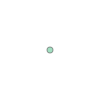

In [2]:
### 点
pt1 = Point(1, 0)  ## 点
print(type(pt1))
pt1


In [3]:
pt2 = Point(3, 2)  ## 点
pt3 = Point(5, 1)  ## 点


<class 'shapely.geometry.linestring.LineString'>
5.06449510224598


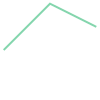

In [10]:
### 线
# line = LineString([pt1, pt2, pt3])
line1 = LineString([(1, 0), (3, 2), (5, 1)])
print(type(line1))
print(line1.length)
line1


(1.0, 0.0, 5.0, 2.0)


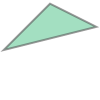

In [14]:
# poly = Polygon([pt1,pt2,pt3])
poly1 = Polygon([(1, 0), (3, 2), (5, 1)])
# print(type(poly1))
# print(poly1.area)
# print(poly1.length)
# print(poly1.centroid)
print(poly1.bounds)
poly1


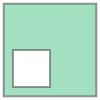

In [15]:
exterior = [(0,0), (0,1), (1,1), (1,0)]
hole = [[(0.1, 0.1), (0.1, 0.5), (0.5, 0.5), (0.5, 0.1)]]
poly2 = Polygon(exterior, holes=hole)  ## 具有空洞的面
poly2


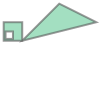

In [16]:
### 多面几何
mpoly = MultiPolygon([poly1, poly2])
mpoly


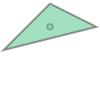

In [17]:
### 几何集合（不同类型几何）
from shapely.geometry import GeometryCollection
pt_centroid = poly1.centroid
geos = GeometryCollection([poly1, pt_centroid])
geos


2. 重投影

In [10]:
pt_wgs84 = Point(115, 30)
transformer = pyproj.Transformer.from_crs(4326, 32648, always_xy=True).transform
pt_utm = transform(transformer, pt_wgs84)
print(pt_utm)


POINT (1466939.692242261 3361248.752300655)


3. 求几何要素间距离

In [21]:
pt = Point(3,0)
dist = pt.distance(pt1)   ## 点与点之间距离
print(dist)
dist = pt.distance(line1)   ## 点到线的距离
print(dist)
dist = pt.distance(poly1)   ## 点到面的距离
print(dist)


2.0
1.4142135623730951
0.48507125007266594


4. 包含分析

In [25]:
poly_centroid = poly1.centroid
print(poly1.contains(pt1))
# print(poly1.contains(poly_centroid))


False


5. 缓冲区分析

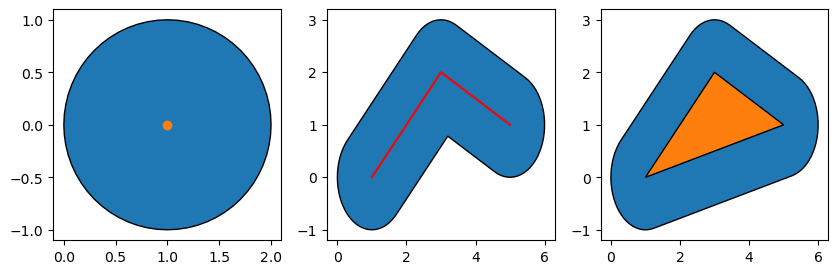

In [33]:
fig, ax = plt.subplots(1,3,figsize=(10,3))
## for the point
pt1_buffer = pt1.buffer(1, cap_style='round')
## visualize
x, y = pt1.xy
x_, y_ = pt1_buffer.exterior.xy
# ax[0].plot(x_,y_)
ax[0].fill(x_, y_, edgecolor='black')
ax[0].scatter(x, y)

## for the line
line1_buffer = line1.buffer(1)
## visualize
x,y = line1.xy
x_,y_ = line1_buffer.exterior.xy
ax[1].fill(x_, y_, edgecolor='black')
ax[1].plot(x,y,color='red')

## for the polygon
poly1_buffer = poly1.buffer(1)
## visualize
x,y = poly1.exterior.xy
x_,y_ = poly1_buffer.exterior.xy
ax[2].fill(x_, y_, edgecolor='black')
ax[2].fill(x, y, edgecolor='black')



6. 几何面重叠区计算

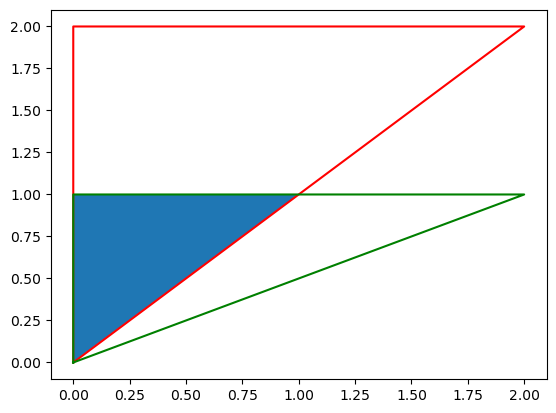

In [36]:
from shapely import intersection
poly1 = Polygon([(0, 0), (0, 2), (2, 2)])
poly2 = Polygon([(0, 0), (0, 1), (2, 1)])
geo_inter = intersection(poly1,poly2)
plt.plot(poly1.exterior.xy[0], poly1.exterior.xy[1], color='red')
plt.plot(poly2.exterior.xy[0], poly2.exterior.xy[1], color='green')
plt.fill(geo_inter.exterior.xy[0], geo_inter.exterior.xy[1])



7. 几何面相剪

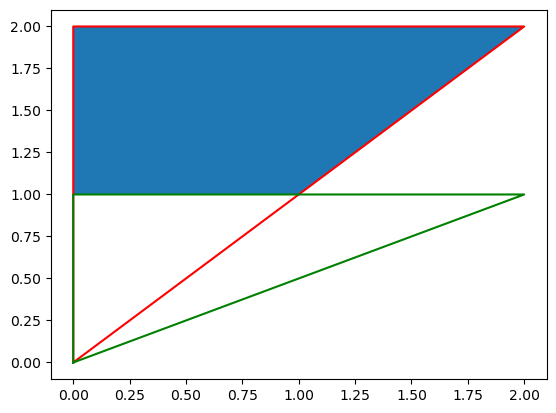

In [39]:
dif_poly = poly1.difference(poly2)
plt.plot(poly1.exterior.xy[0], poly1.exterior.xy[1], color='red')
plt.plot(poly2.exterior.xy[0], poly2.exterior.xy[1], color='green')
plt.fill(dif_poly.exterior.xy[0], dif_poly.exterior.xy[1])


8. 几何面合并

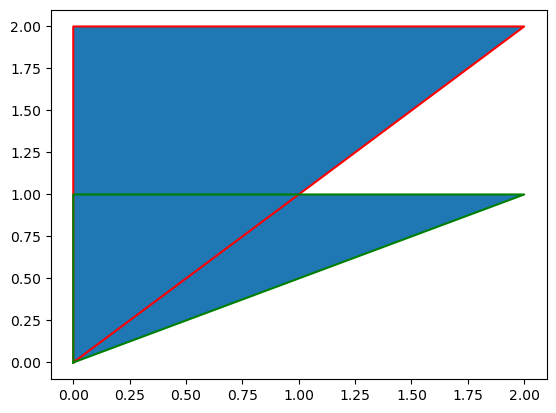

In [41]:
union_poly = poly1.union(poly2)
plt.plot(poly1.exterior.xy[0], poly1.exterior.xy[1], color='red')
plt.plot(poly2.exterior.xy[0], poly2.exterior.xy[1], color='green')
plt.fill(union_poly.exterior.xy[0], union_poly.exterior.xy[1])
